In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Current work
print(os.getcwd())
# Change directory 2 level up
os.chdir("..")
os.chdir("..")
print(os.getcwd())
# Look for the file in the directory
print(os.listdir())

/tmp/ipykernel_9834/955764169.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


/home/jose/Git/SE-AP/experiments/experiment_2
/home/jose/Git/SE-AP
['models', '.pre-commit-config.yaml', 'aaa.png', 'demos', '.gitignore', 'experiments', 'include', '.git', '.env', 'README.md', 'output.png', '.env-example', 'LICENSE']


In [2]:
model = "gpt-3.5-turbo"
prompt_technique = "chain"
temperature = 0.7
embedding_size = 200

In [3]:
data = pd.read_csv(f'experiments/experiment_2/results_with_distances/{model}/results_with_distances_{prompt_technique}_{model}_{temperature}_{embedding_size}.csv')
data[data['Iteration'] == 1]

,Induced Pathology,Category,Surveyed Word,Related 1,Related 2,Related 3,Related 4,Related 5,Related 6,Related 7,...,Sequential Distance 3,Sequential Distance 4,Sequential Distance 5,Sequential Distance 6,Sequential Distance 7,Sequential Distance 8,Sequential Distance 9,Sequential Distance 10,Average Sequential Distance,STD Sequential Distance
0,No Pathology,MWB-C,house,cozy,inviting,spacious,organized,clean,comfortable,welcoming,...,0.657916,0.743089,0.684670,0.661000,0.772007,0.826140,1.101786,0.923429,0.780378,0.139528
1,No Pathology,MWB-C,car,reliable,efficient,sleek,stylish,well-maintained,comfortable,modern,...,0.713055,0.751922,1.077707,0.693521,0.726083,0.703648,0.807126,0.678800,0.753240,0.122741
2,No Pathology,MWB-C,coat,warm,fashionable,stylish,comfortable,well-fitted,versatile,durable,...,0.689897,0.795517,1.000000,0.988074,0.936589,0.847042,0.877733,0.677670,0.819019,0.131313
3,No Pathology,MWB-C,necklace,beautiful,elegant,delicate,eye-catching,stylish,meaningful,timeless,...,0.735499,0.827741,0.803780,1.083618,0.867469,0.706957,0.969976,0.786729,0.818945,0.126029
4,No Pathology,MWB-C,sofa,comfortable,plush,spacious,stylish,supportive,cozy,inviting,...,0.670666,0.755444,0.914930,0.557317,0.896793,0.834038,1.000000,0.650106,0.738861,0.166840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Social Anxiety,I-A,insecurity,self-doubt,uncertainty,fear,vulnerability,anxiety,instability,doubt,...,0.426843,0.468530,0.432918,0.291198,0.695774,0.559420,1.000000,0.483212,0.547182,0.195626
1596,Social Anxiety,I-A,indifference,apathy,unconcern,disinterest,detachment,passivity,disregard,nonchalance,...,0.339988,0.792203,0.337178,0.360758,0.510288,0.573343,0.420352,0.699899,0.506179,0.170958
1597,Social Anxiety,I-A,infidelity,betrayal,unfaithfulness,adultery,disloyalty,treachery,cheating,deceit,...,0.352199,0.634998,0.505702,0.500962,0.569337,0.621075,0.846992,0.655133,0.558616,0.139761
1598,Social Anxiety,I-A,aggressiveness,hostility,belligerence,aggression,combativeness,confrontational,antagonism,violence,...,0.589447,0.447780,0.680291,0.611218,0.845795,0.406073,0.562663,0.436732,0.580048,0.130037


In [5]:
pivot_data = data.pivot_table(index='Surveyed Word', columns='Induced Pathology', values='Average Sequential Distance')
pivot_data

Induced Pathology,Alcohol Addiction,Apathy,Depression,Eating Disorder,Impulsivity,No Pathology,Obsessive Compulsive Disorder,Schizophrenia,Social Anxiety,Trait Anxiety
Surveyed Word,,,,,,,,,,
achievement,0.773337,0.918695,0.851235,0.799830,0.926365,0.549243,0.707871,0.855633,0.802459,0.895851
admiration,0.669134,0.726595,0.859645,0.800582,0.791715,0.523948,0.705511,0.886046,0.734424,0.772615
agenda,0.841200,0.897446,0.842628,0.762388,0.889363,0.695625,0.757561,0.789279,0.778398,0.742209
aggressiveness,0.611682,0.609292,0.617145,0.605536,0.609486,0.623510,0.592074,0.609051,0.600019,0.610436
aid,0.668824,0.985950,0.854277,0.773746,0.968615,0.579588,0.732296,0.883599,0.669929,0.640101
...,...,...,...,...,...,...,...,...,...,...
watch,0.839056,0.768145,0.860753,0.795243,0.788019,0.831945,0.827376,0.867677,0.855821,0.769116
water,0.598384,1.037082,0.771830,0.823695,0.695209,0.651945,0.758841,0.748138,0.863211,0.651253
weakness,0.708114,0.809749,0.714552,0.654395,0.813821,0.694949,0.640398,0.705575,0.639608,0.609334


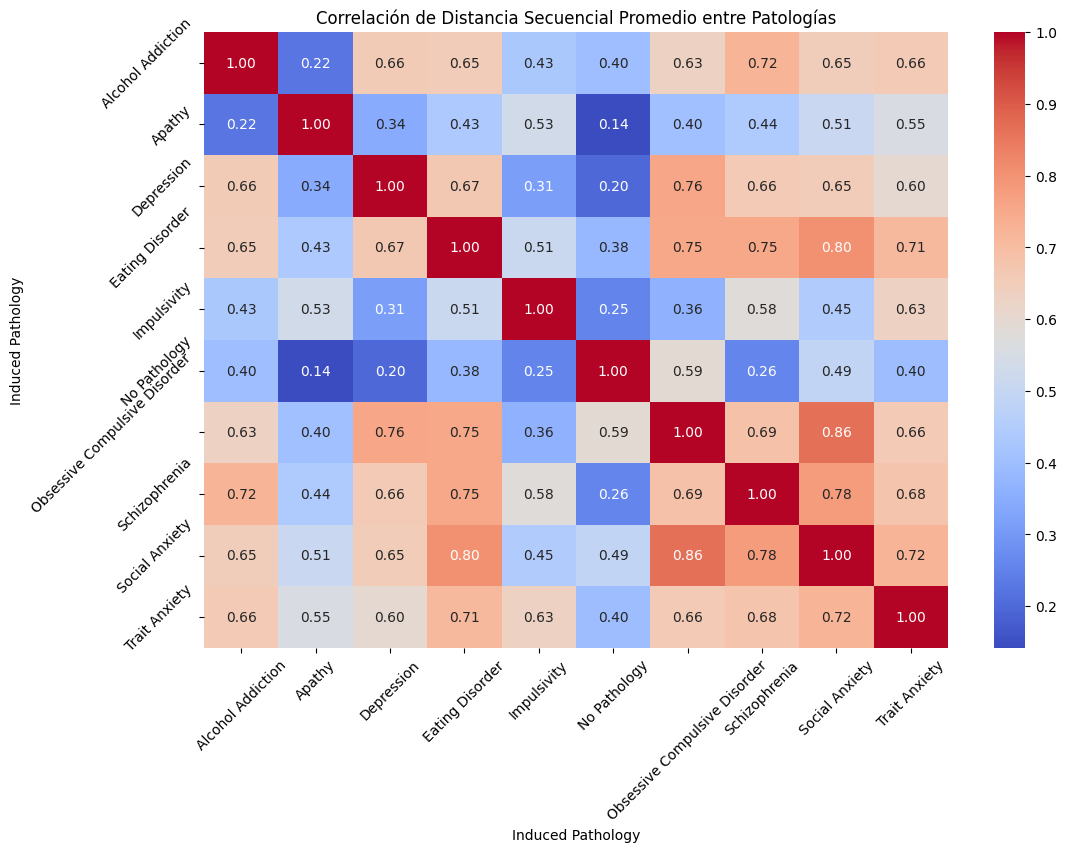

In [6]:
correlation_matrix = pivot_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Distancia Secuencial Promedio entre Patologías')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [8]:

grouped_by_iteration = data.groupby('Iteration').apply(lambda x: x.pivot(index='Surveyed Word', columns='Induced Pathology', values='Average Sequential Distance'))
grouped_by_iteration

/tmp/ipykernel_9834/2797517383.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_by_iteration = data.groupby('Iteration').apply(lambda x: x.pivot(index='Surveyed Word', columns='Induced Pathology', values='Average Sequential Distance'))


Induced Pathology         Alcohol Addiction    Apathy  Depression  \
Iteration Surveyed Word                                             
1         achievement              0.535668  0.989745    0.802193   
          admiration               0.839792  0.882730    0.702812   
          agenda                   0.923764  0.932933    0.853549   
          aggressiveness           0.641866  0.599377    0.588044   
          aid                      0.742119  1.008545    0.855608   
...                                     ...       ...         ...   
100       watch                    0.789274  0.701165    0.803913   
          water                    0.575136  1.043553    0.780507   
          weakness                 0.747723  0.703076    0.788394   
          wealth                   0.532155  0.879143    0.780132   
          yacht                    0.668618  0.707557    0.969880   

Induced Pathology         Eating Disorder  Impulsivity  No Pathology  \
Iteration Surveyed Word                                                
1         achievement            0.804202     0.944850      0.543554   
          admiration             0.789857     0.833225      0.522119   
          agenda                 0.741599     0.922692      0.680668   
          aggressiveness         0.604153     0.570964      0.677887   
          aid                    0.785299     1.013627      0.586013   
...                                   ...          ...           ...   
100       watch                  0.769968     0.844817      0.807637   
          water                  0.832489     1.020253      0.593662   
          weakness               0.610079     0.948177      0.661903   
          wealth                 0.687294     0.571902      0.558636   
          yacht                  0.829424     0.715973      0.694422   

Induced Pathology         Obsessive Compulsive Disorder  Schizophrenia  \
Iteration Surveyed Word                                                  
1         achievement                          0.522094       0.807451   
          admiration                           0.536413       0.917920   
          agenda                               0.792392       0.739221   
          aggressiveness                       0.546872       0.667809   
          aid                                  0.693693       0.939003   
...                                                 ...            ...   
100       watch                                0.822803       0.835421   
          water                                0.728456       0.611950   
          weakness                             0.606585       0.807984   
          wealth                               0.607391       0.606960   
          yacht                                0.719444       0.702379   

Induced Pathology         Social Anxiety  Trait Anxiety  
Iteration Surveyed Word                                  
1         achievement           0.875191       0.823317  
          admiration            0.804397       0.736545  
          agenda                0.808902       0.711163  
          aggressiveness        0.580048       0.585907  
          aid                   0.679152       0.557255  
...                                  ...            ...  
100       watch                 0.973571       0.750348  
          water                 0.889173       0.741571  
          weakness              0.613140       0.578352  
          wealth                0.643652       0.709297  
          yacht                 0.964340       0.724383  

[16000 rows x 10 columns]

In [9]:
corrected_correlation_matrices = []

for iteration in data['Iteration'].unique():
    iteration_data = data[data['Iteration'] == iteration]
    
    pivot_iteration_data = iteration_data.pivot_table(index='Surveyed Word', columns='Induced Pathology', values='Average Sequential Distance')
    
    corr_matrix = pivot_iteration_data.corr()
    print(corr_matrix)
    corrected_correlation_matrices.append(corr_matrix)

Induced Pathology              Alcohol Addiction    Apathy  Depression  \
Induced Pathology                                                        
Alcohol Addiction                       1.000000  0.200350    0.466535   
Apathy                                  0.200350  1.000000    0.225651   
Depression                              0.466535  0.225651    1.000000   
Eating Disorder                         0.627686  0.466276    0.496988   
Impulsivity                             0.330891  0.424935    0.140636   
No Pathology                            0.303249  0.088822    0.140698   
Obsessive Compulsive Disorder           0.676369  0.341528    0.506502   
Schizophrenia                           0.676798  0.384785    0.536653   
Social Anxiety                          0.507899  0.435592    0.357257   
Trait Anxiety                           0.573804  0.516704    0.399686   

Induced Pathology              Eating Disorder  Impulsivity  No Pathology  \
Induced Pathology                 

In [10]:
average_corrected_correlation_matrix = pd.concat(corrected_correlation_matrices).groupby(level=0).mean()
std_corrected_correlation_matrix = pd.concat(corrected_correlation_matrices).groupby(level=0).std()


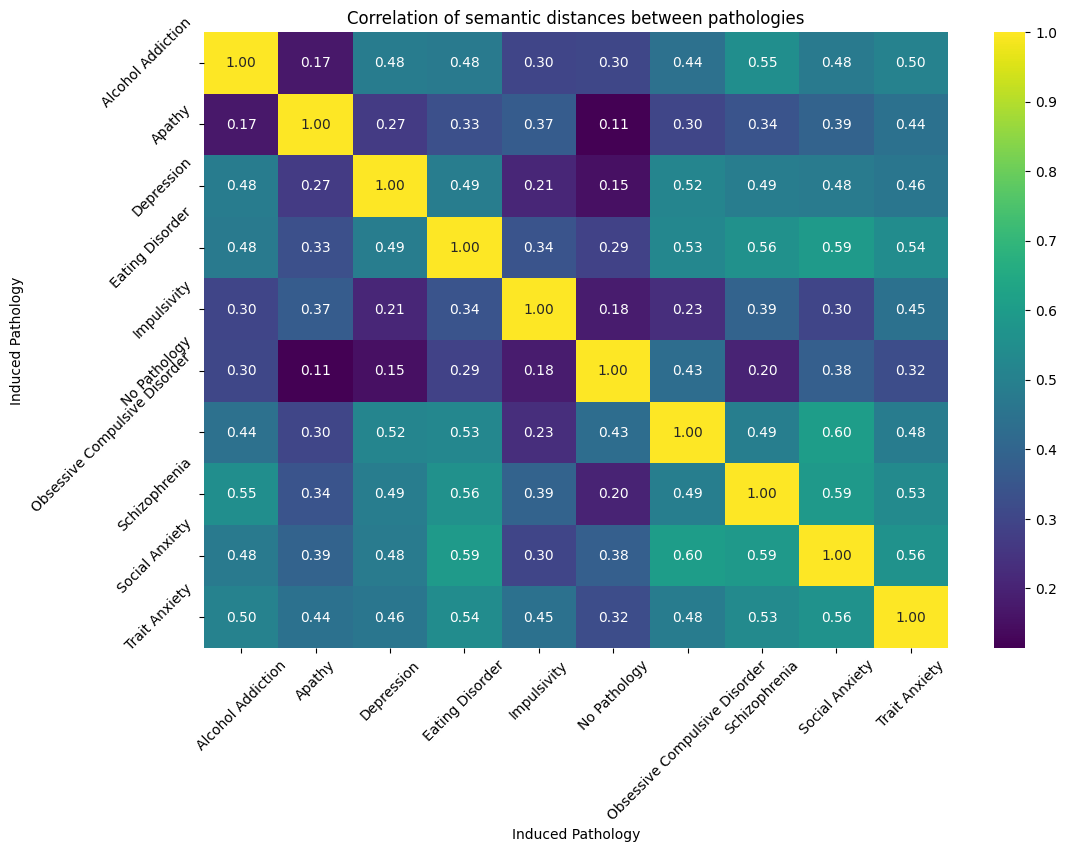

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(average_corrected_correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation of semantic distances between pathologies')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


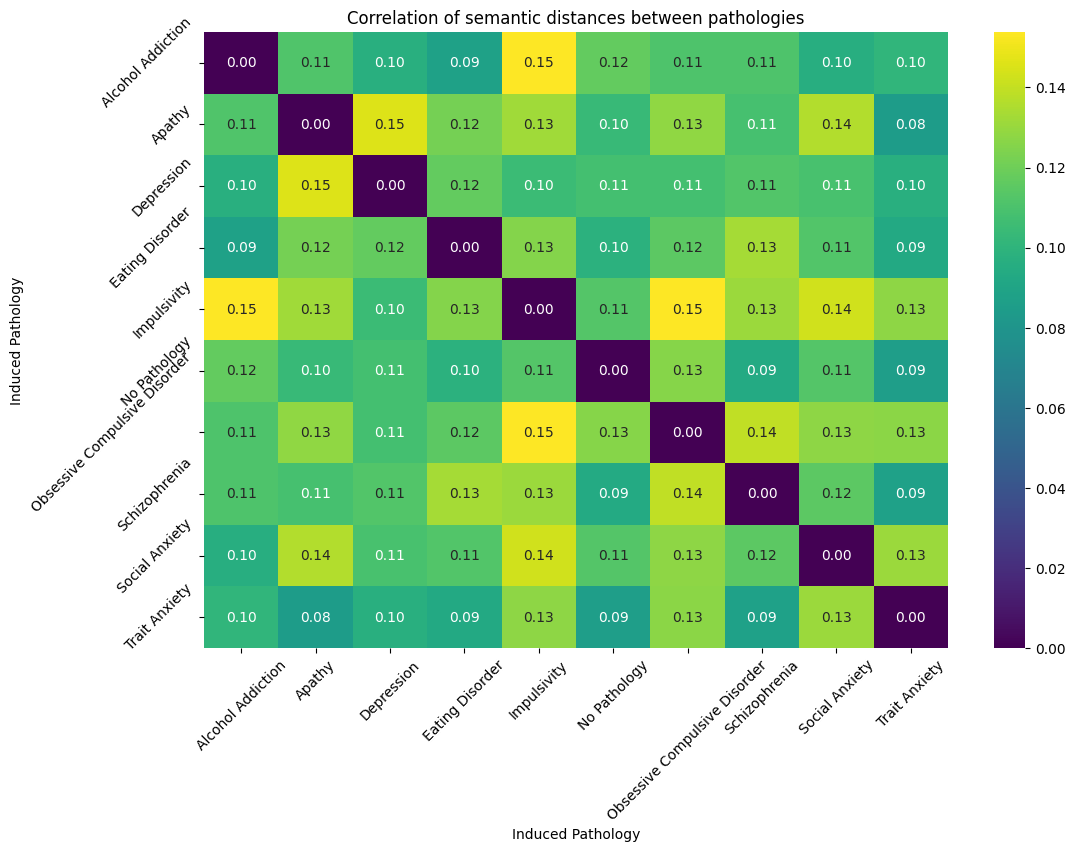

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(std_corrected_correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation of semantic distances between pathologies')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()